In [1]:
import pandas as pd
import numpy as np


from sklearn import preprocessing as prep
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

# SystemAdministrators

In [2]:
dfSA = pd.read_csv('SystemAdministrators.csv') # Read the data
dfSA.info() # Obeserve wehter there is missing values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Experience      75 non-null     float64
 1   Training        75 non-null     int64  
 2   Completed task  75 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


* **</p>There is no any missing values in our data<p>** 

In [3]:
dfSA = pd.get_dummies(dfSA).drop(['Completed task_No'],axis=1) # Convert variable Completed task to binary variable.

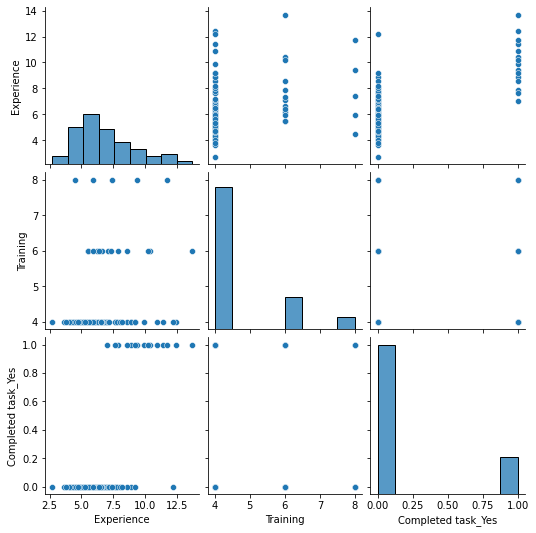

In [4]:
sns.pairplot(dfSA[['Experience','Training','Completed task_Yes']]) # Plot

* **</p>Variable Training contains only three unique values.<p>** 
* **</p>Variable Experience seems to be a right-skewed distribution.<p>** 
* **</p>By observing variable Completed task_Yes, we can find this data imbalanced.<p>**

## Question 1.

In [5]:
dfSA.corr() # Obeserve the correlation coefficient

Experience  Training  Completed task_Yes
Experience            1.000000  0.227849            0.696647
Training              0.227849  1.000000            0.192685
Completed task_Yes    0.696647  0.192685            1.000000

### partA
#### Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.

* **</p>As shown in the correlation coefficient table, Experience has a greater correlation coefficient with Completed, so we choose this variable to be included in my model.<p>**

In [6]:
# Split Data
predictors = ['Experience']
X = dfSA[predictors] 
y = dfSA['Completed task_Yes'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1089)

In [7]:
# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

In [8]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [9]:
# Store predicted probability for Completed task_Yes = 1
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)


In [10]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

threshold  recall   FPR  FNR  F1_Score  Accuracy
0         0.0     1.0  1.00  0.0      0.36      0.22
1         0.1     1.0  0.33  0.0      0.62      0.74
2         0.2     1.0  0.17  0.0      0.77      0.87
3         0.3     1.0  0.11  0.0      0.83      0.91
4         0.4     0.6  0.06  0.4      0.67      0.87
5         0.5     0.4  0.00  0.6      0.57      0.87
6         0.6     0.4  0.00  0.6      0.57      0.87
7         0.7     0.2  0.00  0.8      0.33      0.83
8         0.8     0.2  0.00  0.8      0.33      0.83
9         0.9     0.0  0.00  1.0      0.00      0.78
10        1.0     0.0  0.00  1.0      0.00      0.78

### partB
#### choose a classification threshold and explain your choice.

* **</p>As shown in the table above, I will choose 0.3 as my threshold because F1_Score at 0.3 is greater than others. Also, when we face imbalanced data, F1 score is a better choice to evaluate our model.<p>**

### partC
#### Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

* **</p>I will choose F1-Score as my performance measure because it is the combination of Recall and Precision, which means it can reflect whether our model can correctly identify positive cases and negative cases. <p>**
* **</p>If we use Recall<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use FPR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the positive cases.</font>
* **</p>If we use FNR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use Accuracy<p>** 
><font color='blue'>In this case, we still can get a good performance even if our model is not able to identify the negative cases because there are too few cases in negative.</font>

In [11]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.3)[0]

# Create Metrics
confusion_lr = metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value_lr = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value_lr = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value_lr = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value_lr = metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value_lr = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)  

## Question 2.

In [12]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)
results



/Users/kuan-chih/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k  accuracy  fnr  f1_value  recall_value  precision_score
0    1  0.826087  0.2     0.667           0.8            0.571
1    2  0.869565  0.6     0.571           0.4            1.000
2    3  0.826087  0.4     0.600           0.6            0.600
3    4  0.869565  0.4     0.667           0.6            0.750
4    5  0.869565  0.4     0.667           0.6            0.750
5    6  0.869565  0.6     0.571           0.4            1.000
6    7  0.869565  0.4     0.667           0.6            0.750
7    8  0.913043  0.4     0.750           0.6            1.000
8    9  0.869565  0.2     0.727           0.8            0.667
9   10  0.869565  0.4     0.667           0.6            0.750
10  11  0.869565  0.4     0.667           0.6            0.750
11  12  0.913043  0.4     0.750           0.6            1.000
12  13  0.913043  0.4     0.750           0.6            1.000
13  14  0.869565  0.6     0.571           0.4            1.000
14  15  0.913043  0.4     0.750           0.6            1.000
15  16  0.869565  0.6     0.571           0.4            1.000
16  17  0.869565  0.6     0.571           0.4            1.000
17  18  0.869565  0.6     0.571           0.4            1.000
18  19  0.869565  0.6     0.571           0.4            1.000
19  20  0.782609  1.0     0.000           0.0            0.000

In [13]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['f1_value'],
                         mode='lines+markers',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['accuracy'],
                         mode='lines+markers',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['recall_value'],
                         mode='lines+markers',
                         name='recall',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['precision_score'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show()

### partA
#### Choose k, the number of neighbors to use in your classification. Why did you select that value?

* **</p>As shown in the plot above, when k is 15, F1-Score, accuracy, recall and precision are all high. Although the highest recall occurs when k is euqal to 15, however, other performance metrics are too low, so I will choose 15 as my k number. <p>**


### partB
#### You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.”  If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.



In [14]:
# k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [15]:
# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [16]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result


threshold  recall    FPR  FNR  F1_Score  Accuracy
0         0.0     1.0  0.333  0.0     0.625     0.739
1         0.1     1.0  0.278  0.0     0.667     0.783
2         0.2     1.0  0.111  0.0     0.833     0.913
3         0.3     1.0  0.111  0.0     0.833     0.913
4         0.4     0.6  0.056  0.4     0.667     0.870
5         0.5     0.6  0.000  0.4     0.750     0.913
6         0.6     0.0  0.000  1.0     0.000     0.783
7         0.7     0.0  0.000  1.0     0.000     0.783
8         0.8     0.0  0.000  1.0     0.000     0.783
9         0.9     0.0  0.000  1.0     0.000     0.783
10        1.0     0.0  0.000  1.0     0.000     0.783

### partC 
#### In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).

* **</p>As shown in the table in part A, when k is 15, F1-Score, accuracy, recall and precision are all high, so we choose 15 as our number. In part B, we are able to know when threshold is 0.3 or 0.2, except FPR, all performance metrics are the best, so we choose it as our threshold. Because F1-score is the weighted average of Precision and Recall, it can take both False positive and False negative into account, so our goal is to select the value that can give us the highest F1-score. <p>**

In [17]:
knn = KNeighborsClassifier(n_neighbors=15)
y_pred_class = binarize([y_pred_prob],threshold=0.2)[0]
# Create Metrics
confusion_knn = metrics.confusion_matrix(y_test, y_pred_class)
recall_value_knn = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value_knn = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value_knn = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value_knn = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value_knn = metrics.accuracy_score(y_test, y_pred_class).round(2)

## Question 3.

In [18]:
report=pd.DataFrame({'Method':['LogReg','kNN'],
                     'Recall':[recall_value_lr,recall_value_knn],
                     'FPR':[fpr_value_lr,fpr_value_knn],
                     'FNR':[fnr_value_lr,fnr_value_knn],
                     'FI':[f1_value_lr,f1_value_knn],
                     'Accuracy':[accuracy_value_lr,accuracy_value_knn]
                    })
report

Method  Recall   FPR  FNR    FI  Accuracy
0  LogReg     1.0  0.11  0.0  0.83      0.91
1     kNN     1.0  0.11  0.0  0.83      0.91

#### Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?
* **</p>In this data, Although these two methods have the same performance on prediction, I will go for Logistic Regression because I can interpret it coefficient easily.</p>**


$$P(Completed task =1)= \frac{1}{e^{-({-2.00613233+1.6864989{Experience}})}}$$ 
<p></p>
$$ e^{1.6864989} = 5.4005 $$

**interpretion:**<br>
* **</p>An additional year to expreience multiplies the odds of Completed task by 5.4005.<p>**


# BostonHousing

In [19]:
dfBH = pd.read_csv('BostonHousing.csv') # Read the data
dfBH.info() # Obeserve wehter there is missing values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


* **</p>There is no any missing values in our data<p>** 

In [20]:
dfBH.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             MEDV   CAT. MEDV  
count  506.000000  506.000000  
mean    22.532806    0.166008  
std      9.197104    0.372456  
min      5.000000    0.000000  
25%     17.025000    0.000000  
50%     21.200000    0.000000  
75%     25.000000    0.000000  
max     50.000000    1.000000

* **</p>The standard deviations of CRIM, ZN, CHAS, and CAT.MEDV are greater than their own mean, which indicates high variation between values.<p>** 
* **</p>There is a great difference in each range among each variable.<p>**

## Question 1.

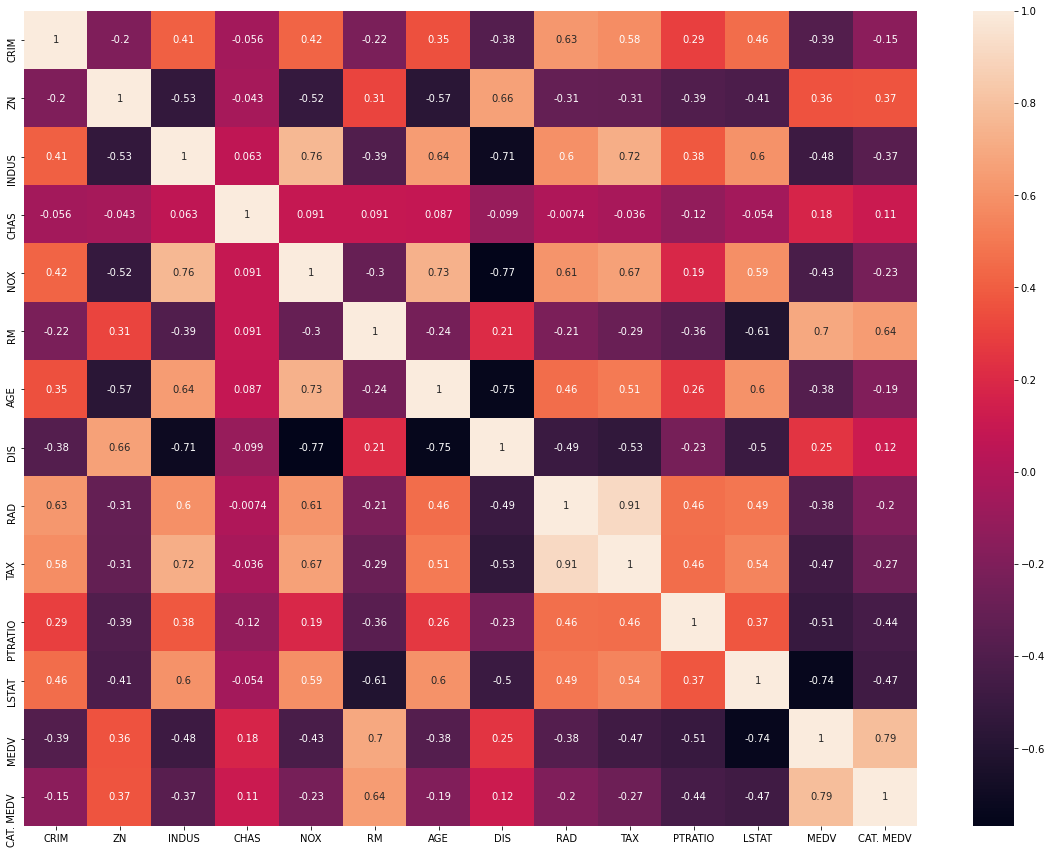

In [21]:
# Heatmap.
plt.figure(figsize=(20, 15))
sns.heatmap(dfBH.corr(),annot=True)
plt.show()

### partA
#### Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.
* **</p>I will choose a varaible as my predictor if its correaltion coefficient with CAT.MEDV is greater than 0.3, so ZN, INDUS, RM, PTRATIO, LSTAT, and MEDV will be choosen. However, we should remove MEDV from our predictors becasue understanding the relation between MEDV and CAT.MEDV is meaningless.</p>**


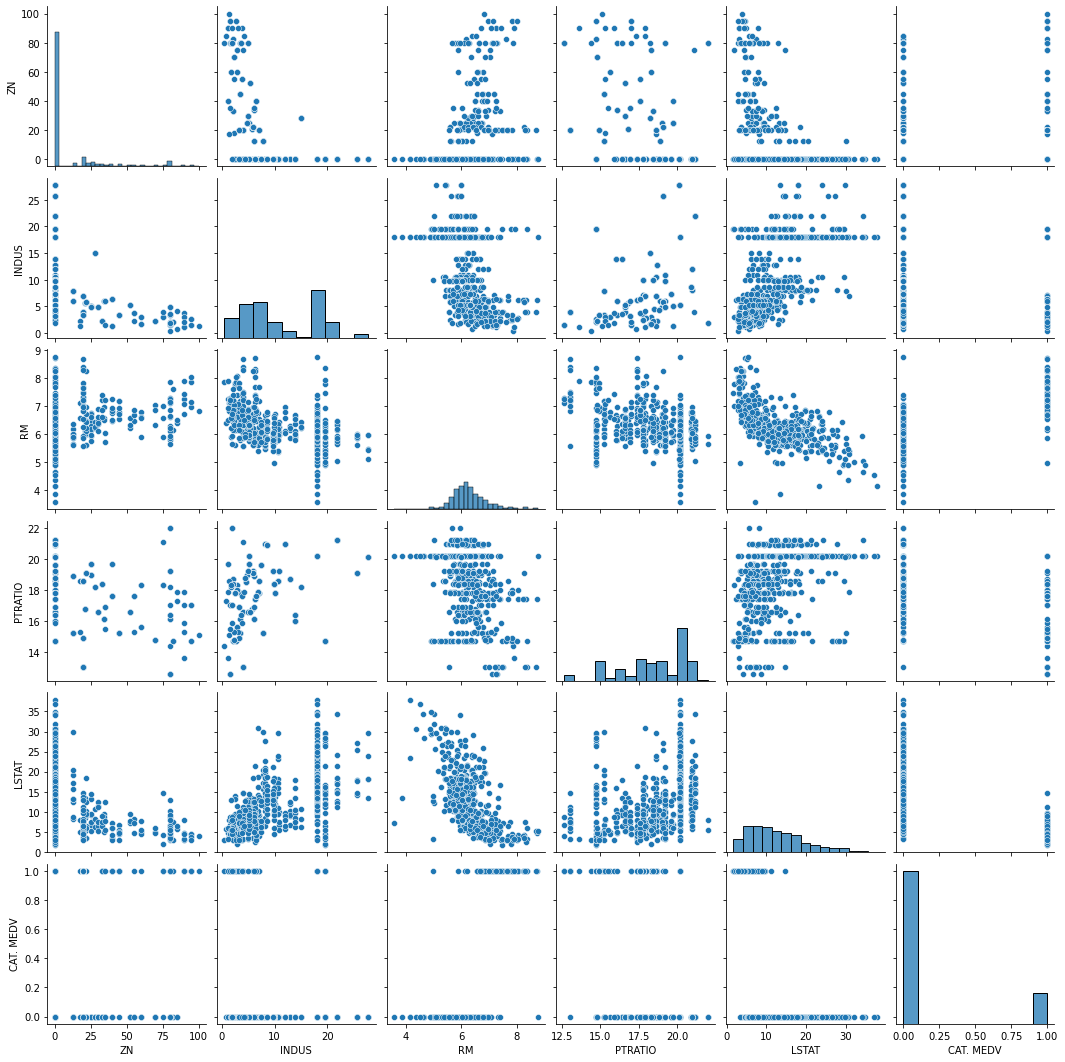

In [53]:
sns.pairplot(dfBH[['ZN', 'INDUS', 'RM', 'PTRATIO','LSTAT','CAT. MEDV']]) # Plot

* **</p>There are many zero values in variable ZN.<p>** 
* **</p>By observing variable CAT. MEDV, we can find this data imbalanced.<p>**
* **</p>Variable LSTAT seems to be a right-skewed distribution.<p>**
* **</p>There is a negative correlation between LSTAT and RM.<p>**

In [54]:
# Split Data
predictors = ['ZN', 'INDUS', 'RM', 'PTRATIO','LSTAT']
X = dfBH[predictors] 
y = dfBH['CAT. MEDV'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1089)

In [55]:
# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

In [56]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [57]:
# Store predicted probability
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)



In [58]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

threshold  recall   FPR   FNR  F1_Score  Accuracy
0         0.0    1.00  1.00  0.00      0.23      0.13
1         0.1    0.95  0.18  0.05      0.60      0.84
2         0.2    0.95  0.14  0.05      0.67      0.88
3         0.3    0.90  0.13  0.10      0.65      0.88
4         0.4    0.90  0.07  0.10      0.77      0.93
5         0.5    0.85  0.06  0.15      0.76      0.93
6         0.6    0.80  0.04  0.20      0.78      0.94
7         0.7    0.75  0.02  0.25      0.81      0.95
8         0.8    0.60  0.01  0.40      0.73      0.94
9         0.9    0.45  0.00  0.55      0.62      0.93
10        1.0    0.00  0.00  1.00      0.00      0.87

### partB
#### choose a classification threshold and explain your choice.

* **</p>As shown in the table above, I will choose 0.7 as my threshold because F1_Score at 0.7 is greater than others. In addition, when we face imbalanced data, F1 score is a better choice to evaluate our model.<p>**

### partC
#### Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

* **</p>I will choose F1-Score as my performance measure because it is the combination of Recall and Precision, which means it can reflect whether our model can correctly identify positive cases and negative cases.<p>** 
* **</p>If we use Recall <p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use FPR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the positive cases.</font>
* **</p>If we use FNR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use Accuracy<p>** 
><font color='blue'>In this case, we still can get a good performance even if our model is not able to identify the positive cases because there are too few cases in positive.</font>

In [59]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.4)[0]

# Create Metrics
confusion_lr = metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value_lr = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value_lr = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value_lr = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value_lr = metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value_lr = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)  

## Question 2.

In [60]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)

In [61]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['f1_value'],
                         mode='lines+markers',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['accuracy'],
                         mode='lines+markers',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['recall_value'],
                         mode='lines+markers',
                         name='recall',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,30)), 
                         y=results['precision_score'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show()

### partA
#### Choose k, the number of neighbors to use in your classification. Why did you select that value?

* **</p>As shown in the plot above, when k is 13, F1-Score, accuracy, recall, and precision are all high. Although the highest precision occurs when k is euqal to 12, however, other performance metrics are too low, so I will choose 13 as my k number. <p>**



### partB
#### You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.”  If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.

In [62]:
# k=13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [63]:
# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [65]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result



threshold  recall    FPR   FNR  F1_Score  Accuracy
0         0.0    0.95  0.242  0.05     0.535     0.783
1         0.1    0.95  0.174  0.05     0.613     0.842
2         0.2    0.90  0.129  0.10     0.655     0.875
3         0.3    0.80  0.106  0.20     0.640     0.882
4         0.4    0.80  0.061  0.20     0.727     0.921
5         0.5    0.80  0.023  0.20     0.821     0.954
6         0.6    0.70  0.015  0.30     0.778     0.947
7         0.7    0.65  0.008  0.35     0.765     0.947
8         0.8    0.55  0.008  0.45     0.687     0.934
9         0.9    0.55  0.000  0.45     0.710     0.941
10        1.0    0.00  0.000  1.00     0.000     0.868

### partC 
#### In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).

* **</p>shown in the table in part A, when k is 13, F1-Score, accuracy, recall and precision are all high, so we choose 13 as our number. In part B, we are able to know when threshold is 0.5, F1-score is the highest among all thresholds, so we choose it as our threshold. Because F1-score is the weighted average of Precision and Recall, it can take both False positive and False negative into account, so our goal is to select the value that can give us the highest F1-score.<p>**

In [66]:
knn = KNeighborsClassifier(n_neighbors=18)
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
# Create Metrics
confusion_knn = metrics.confusion_matrix(y_test, y_pred_class)
recall_value_knn = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value_knn = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value_knn = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value_knn = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value_knn = metrics.accuracy_score(y_test, y_pred_class).round(2)

## Question 3.

In [67]:
report=pd.DataFrame({'Method':['LogReg','kNN'],
                     'Recall':[recall_value_lr,recall_value_knn],
                     'FPR':[fpr_value_lr,fpr_value_knn],
                     'FNR':[fnr_value_lr,fnr_value_knn],
                     'FI':[f1_value_lr,f1_value_knn],
                     'Accuracy':[accuracy_value_lr,accuracy_value_knn]
                    })
report

Method  Recall   FPR  FNR    FI  Accuracy
0  LogReg     0.9  0.07  0.1  0.77      0.93
1     kNN     0.8  0.02  0.2  0.82      0.95

#### Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?
* **</p>In this data, kNN has a better perfomance on F1, so I will go for it.<p>**
    

# HeartDisease

In [36]:
dfHD = pd.read_excel('HeartDisease.xls') # Read the data
dfHD.info() # Obeserve wehter there is missing values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


* **</p>There is no any missing values in our data<p>** 

In [37]:
dfHD.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

           target  
count  303.000000  
mean     0.544554  
std      0.498835  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

* **</p>The standard deviations of cp, fbs, exang, oldpeak, and ca are greater than their own mean, which indicates ther are high variation between values.<p>** 
* **</p>There is a great difference in each range among each variable.<p>**

## Question 1.

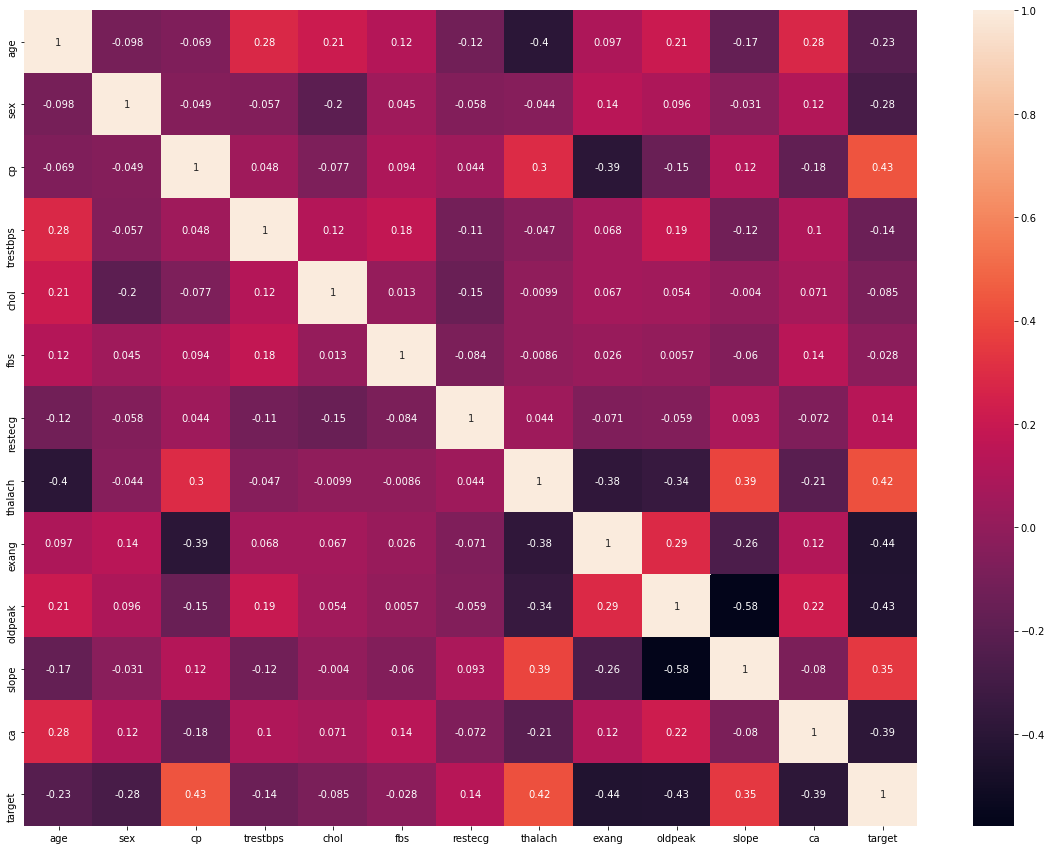

In [38]:
# Heatmap.
plt.figure(figsize=(20, 15))
sns.heatmap(dfHD.corr(),annot=True)
plt.show()

### partA
#### Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.
* **</p>I will choose a varaible as my predictor if its correaltion coefficient with target is greater than 0.3, so cp, thalach, exang, oldpeak, slope, and ca will be choosen.</p>**

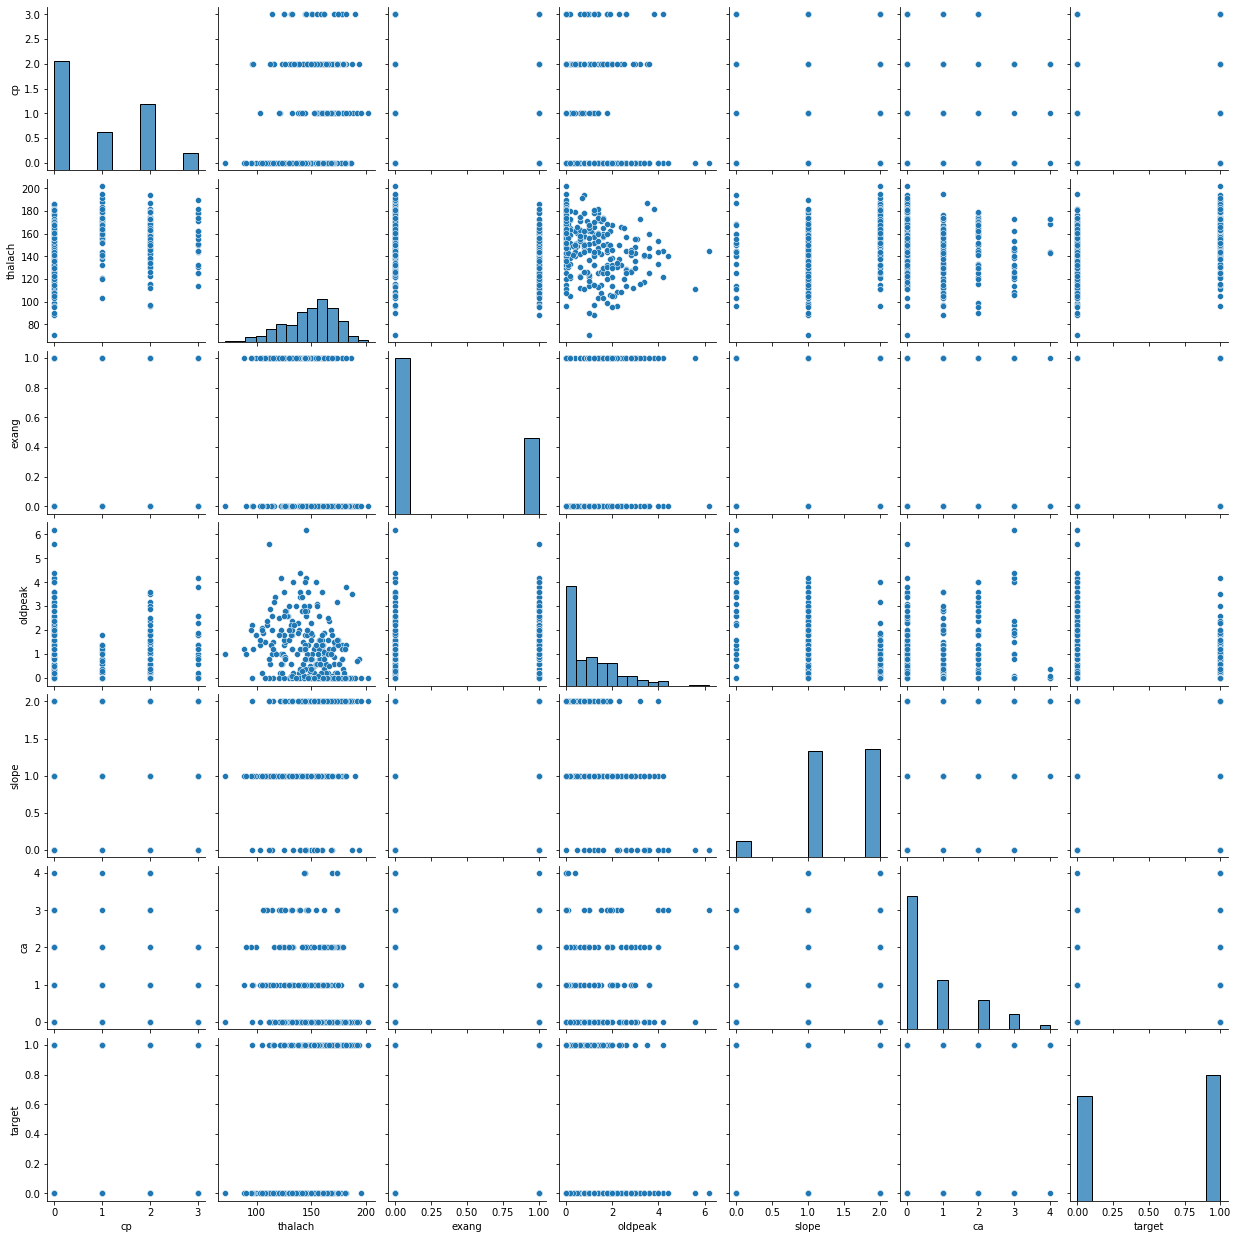

In [39]:
sns.pairplot(dfHD[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','target']]) # Plot

* **</p>By observing variable target, we can find this data balanced.<p>**

In [40]:
# Split Data
predictors = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
X = dfHD[predictors] 
y = dfHD['target'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1089)

In [41]:
# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

In [42]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [43]:
# Store predicted probability
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)




In [44]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

threshold  recall   FPR   FNR  F1_Score  Accuracy
0         0.0    1.00  1.00  0.00      0.71      0.55
1         0.1    1.00  0.61  0.00      0.80      0.73
2         0.2    1.00  0.54  0.00      0.82      0.76
3         0.3    1.00  0.44  0.00      0.85      0.80
4         0.4    1.00  0.39  0.00      0.86      0.82
5         0.5    0.94  0.32  0.06      0.85      0.82
6         0.6    0.88  0.27  0.12      0.84      0.81
7         0.7    0.76  0.17  0.24      0.80      0.79
8         0.8    0.66  0.15  0.34      0.74      0.75
9         0.9    0.38  0.10  0.62      0.52      0.62
10        1.0    0.00  0.00  1.00      0.00      0.45

### partB
#### choose a classification threshold and explain your choice.

* **</p>As shown in the table above, I will choose 0.4 as my threshold because both F1_Score and Accuracy at 0.4 are greater than others.<p>**

### partC
#### Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

* **</p>I will choose Accuracy or F1-Score as my performance measures becasue this data is balanced and because F1-Score is the combination of Recall and Precision, which means it can reflect whether our model can correctly identify positive cases and negative cases.<p>** 
* **</p>If we use Recall <p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use FPR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the positive cases.</font>
* **</p>If we use FNR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>

In [45]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.4)[0]

# Create Metrics
confusion_lr = metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value_lr = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value_lr = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value_lr = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value_lr = metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value_lr = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)  

## Question 2.

In [46]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)

In [47]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['f1_value'],
                         mode='lines+markers',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['accuracy'],
                         mode='lines+markers',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['recall_value'],
                         mode='lines+markers',
                         name='recall',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,50)), 
                         y=results['precision_score'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show()

### partA
#### Choose k, the number of neighbors to use in your classification. Why did you select that value?

* **</p>As shown in the plot above, when k is 9, F1-Score, accuracy, recall, and precision are all high. Although the highest recall occurs when k is euqal to 34, 35 or 36, however, other performance metrics are too low, so I will choose 9 as my k number. <p>**




### partB
#### You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.”  If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.

In [48]:
# k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [49]:
# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [50]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result




threshold  recall    FPR   FNR  F1_Score  Accuracy
0         0.0    1.00  0.732  0.00     0.769     0.670
1         0.1    1.00  0.732  0.00     0.769     0.670
2         0.2    1.00  0.610  0.00     0.800     0.725
3         0.3    1.00  0.488  0.00     0.833     0.780
4         0.4    1.00  0.366  0.00     0.870     0.835
5         0.5    0.98  0.293  0.02     0.883     0.857
6         0.6    0.90  0.220  0.10     0.865     0.846
7         0.7    0.72  0.171  0.28     0.774     0.769
8         0.8    0.50  0.098  0.50     0.633     0.681
9         0.9    0.38  0.073  0.62     0.528     0.626
10        1.0    0.00  0.000  1.00     0.000     0.451

### partC 
#### In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).

* **</p>shown in the table in part A, when k is 9, F1-Score, accuracy, recall and precision are all high, so we choose 9 as our number. In part B, we are able to know when threshold is 0.5, Both F1-score and Accuracy are the highest among all thresholds, so we choose it as our threshold. Our goal is to select the value that can give us the highest F1-score and Accuracy.<p>**

In [51]:
knn = KNeighborsClassifier(n_neighbors=9)
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
# Create Metrics
confusion_knn = metrics.confusion_matrix(y_test, y_pred_class)
recall_value_knn = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value_knn = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value_knn = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value_knn = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value_knn = metrics.accuracy_score(y_test, y_pred_class).round(2)

## Question 3.

In [52]:
report=pd.DataFrame({'Method':['LogReg','kNN'],
                     'Recall':[recall_value_lr,recall_value_knn],
                     'FPR':[fpr_value_lr,fpr_value_knn],
                     'FNR':[fnr_value_lr,fnr_value_knn],
                     'FI':[f1_value_lr,f1_value_knn],
                     'Accuracy':[accuracy_value_lr,accuracy_value_knn]
                    })
report

Method  Recall   FPR   FNR    FI  Accuracy
0  LogReg    1.00  0.39  0.00  0.86      0.82
1     kNN    0.98  0.29  0.02  0.88      0.86

#### Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?
* **</p>In this data, kNN has better perfomances on F1 and Accuracy, so I will go for kNN.<p>**